In [0]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math

In [0]:
abalone = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/abalone_csv.csv')

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [0]:
abalone_m = abalone[(abalone['Sex'] == 'M')]
abalone_f = abalone[(abalone['Sex'] == 'F')]

In [5]:
abalone_m.info()
abalone_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1528 non-null   object 
 1   Length                 1528 non-null   float64
 2   Diameter               1528 non-null   float64
 3   Height                 1528 non-null   float64
 4   Whole_weight           1528 non-null   float64
 5   Shucked_weight         1528 non-null   float64
 6   Viscera_weight         1528 non-null   float64
 7   Shell_weight           1528 non-null   float64
 8   Class_number_of_rings  1528 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 119.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 2 to 4175
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1307 non-null   obje

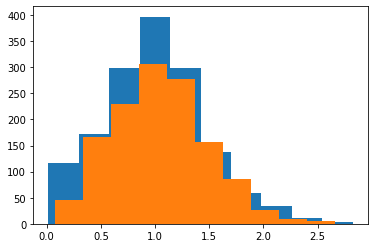

In [6]:
plt.hist(abalone_m['Whole_weight'])
plt.hist(abalone_f['Whole_weight'])
plt.show()

In [7]:
print(stats.describe(abalone_m.Whole_weight))
print(stats.describe(abalone_f.Whole_weight))

DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)
DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)


Yes, the variable meets the assumptions we need to perform t-test analysis:

1. the test variable is continuous - weight is a continuous numerical variable

2. independent observations - the weight of one abalone should not affect the weight of another abalone; there could be some correlation, such as abalone in a certain area having higher whole weights than abalone in a different region, but such differences should not cause a significant difference between male and female weights, as any difference from other factors would equally impact both populations (or such sex-discriminant effects would be part of why abalone whole weight is affected by sex)

3. random sampling - we assume that this is true

4. approximately normal distribution - visually and statistically (skewness of 0.4 for males, 0.37 for females, and kurtosis of 0.35 for males, 0.06 for females), both populations are reasonably normal

5. reasonably large sample size - male sample is 1528, female sample is 1307; should easily be large enough

6. approximately equal variance - variance of 0.22 for males, 0.19 for females

Null hypothesis: there is no significant statistical difference between the whole weight of male and female abalone

Alternative hypothesis: there is a significant statistical difference between the whole weight of male and female abalone

In [8]:
stats.ttest_ind(abalone_m.Whole_weight, abalone_f.Whole_weight)

Ttest_indResult(statistic=-3.230536346547456, pvalue=0.0012497207919589404)

The test statistic is -3.23 and the p-value is 0.001. Therefore, given the standard significance level of 0.05, we would conclude that there is a significant difference between the whole weight of male and female abalone with a p-value of 0.001, meaning that there is a 0.1% chance that we would see the observed difference in whole weight if the null hypothesis (there is no significant difference between male and female whole weight) were true.

In [0]:
mean_m = abalone_m.Whole_weight.mean()
mean_f = abalone_f.Whole_weight.mean()
var_m = abalone_m.Whole_weight.var()
var_f = abalone_f.Whole_weight.var()
n_m = abalone_m.shape[0]
n_f = abalone_f.shape[0]

In [21]:
ci_upper = (mean_m - mean_f) + 1.96 * math.sqrt(var_m / n_m + var_f / n_f)
ci_lower = (mean_m - mean_f) - 1.96 * math.sqrt(var_m / n_m + var_f / n_f)
print('The 95% two-tail confidence interval is between {} and {}.'.format(ci_lower, ci_upper))

The 95% two-tail confidence interval is between -0.08825425196320211 and -0.021891169188311944.


In [ ]:
### Comments from Mike:

### What does your confidence interval result tell you? How would you present this result to a stakeholder?